In [1]:
pathtorepo = "C:\\Users\\Alex\\Desktop\\"

using Pkg
Pkg.activate(pathtorepo * "dynamical-systems\\env\\integrate\\")

  Activating project at `C:\Users\Alex\Desktop\dynamical-systems\env\integrate`


In [2]:
using StaticArrays, DifferentialEquations, DynamicalSystems, CairoMakie

In [3]:
@inbounds U(y, p) = p[8] + p[9] / ( 1.0 + exp( -50.0 * (y - p[7]) ) )
@inbounds σ(x, p) = 1.0 / ( 1.0 + exp( -20.0 * (x-p[6]) ) )
@inbounds g(E, x, y, p, U_) = log( 1.0 + exp( (p[5] * U_ * x * E + p[11]  ) / (p[1]) ) )

@inbounds function TM(u, p, t)
    
    U_ = U(u[3], p)
    
    du1 = (-u[1] + p[1] * g(u[1], u[2], u[3], p, U_) ) / p[2]
    du2 = (1.0 - u[2]) / p[3] - U_*u[2]*u[1]
    du3 = (-u[3])/p[4] + p[10] * σ(u[2], p)
    
    return SVector(du1, du2, du3)
end

TM (generic function with 1 method)

In [5]:
t = 500.0; tt = 250.0; tstep = 0.001
trange = range(0.0, t, step = tstep)
integ_set = (alg = RK4(), adaptive = false, dt = tstep);

In [6]:
τ = 0.013;  τD = 0.080;  τy = 3.3;  J = 3.07;  β = 0.300
xthr = 0.75; ythr = 0.4
α = 1.58;  U0 = 0.3;  ΔU0 = 0.305;  I0 = -1.0;

In [7]:
p = SA[α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0]
u0 = SA[8.39353, 0.73803, 0.429055]
ds = ContinuousDynamicalSystem(TM, u0, p)

3-dimensional CoupledODEs
 deterministic: true
 discrete time: false
 in-place:      false
 dynamic rule:  TM
 ODE solver:    Tsit5
 ODE kwargs:    (abstol = 1.0e-6, reltol = 1.0e-6)
 parameters:    [1.58, 0.013, 0.08, 3.3, 3.07, 0.75, 0.4, 0.3, 0.305, 0.3, -1.0]
 time:          0.0
 state:         [8.39353, 0.73803, 0.429055]


In [8]:
lb_size = 35; tck_size = 30; dis  = 60;

### Regular Spike

In [9]:
p = SA[α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, -1.4]
u0 = SA[8.39353, 0.73803, 0.429055]
ds = CoupledODEs(TM, u0, p, diffeq = integ_set)

3-dimensional CoupledODEs
 deterministic: true
 discrete time: false
 in-place:      false
 dynamic rule:  TM
 ODE solver:    RK4
 ODE kwargs:    (adaptive = false, dt = 0.001)
 parameters:    [1.58, 0.013, 0.08, 3.3, 3.07, 0.75, 0.4, 0.3, 0.305, 0.3, -1.4]
 time:          0.0
 state:         [8.39353, 0.73803, 0.429055]


In [10]:
tr, trange1 = trajectory(ds, t, Δt = tstep; Ttr = tt)

(3-dimensional StateSpaceSet{Float64} with 500001 points, 250.0:0.001:750.0)

In [11]:
trange = range(0.0, t, step = tstep)

0.0:0.001:500.0

In [12]:
ts, tf = 1, 15000

(1, 15000)

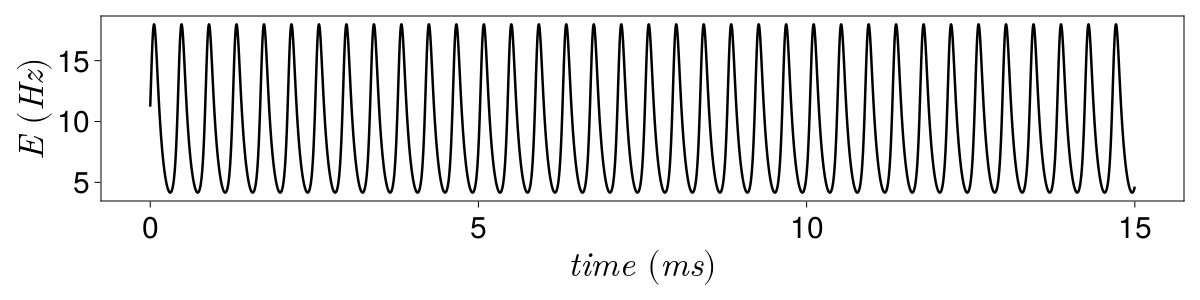

In [56]:
f = Figure(resolution = (1200, 300))
axis = Axis(f[1, 1], xlabel = L"$time$ $(ms)$", ylabel = L"$E$ $(Hz)$",
            xlabelsize = lb_size, ylabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size,
            xgridvisible = false, ygridvisible = false)
lines!(axis, trange[ts:tf], tr[ts:tf, 1], linewidth = 2.5, color = :black)
f

In [57]:
save("timeseries_spike_3th.eps", f)

CairoMakie.Screen{EPS}


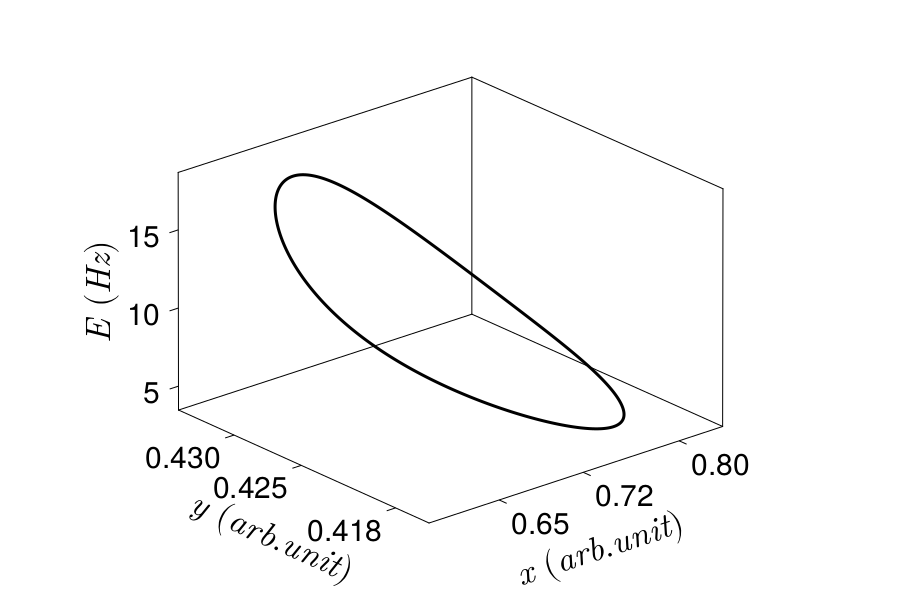

In [58]:
f = Figure(resolution = (900, 600))
axis3 = Axis3(f[1, 1], xlabel = L"$x$ $(arb. unit)$", ylabel = L"$y$ $(arb. unit)$", zlabel = L"$E$ $(Hz)$",
                xlabelsize = lb_size, ylabelsize = lb_size, zlabelsize = lb_size,
                xticklabelsize = tck_size, yticklabelsize = tck_size, zticklabelsize = tck_size,
                xgridvisible = false, ygridvisible = false, zgridvisible = false,
                yticks = [0.418, 0.425, 0.43], xticks = [0.65, 0.72, 0.8], zticks = [5, 10, 15],
                protrusions = dis, xlabeloffset = dis, ylabeloffset = dis, zlabeloffset = dis)


                # yticks = [0.418, 0.425, 0.430], xticks = [0.65, 0.75, 0.8], zticks = [5, 10, 15]) without unit
lines!(axis3, tr[ts:tf, 2], tr[ts:tf, 3], tr[ts:tf, 1], linewidth = 3.0, color = :black)
f

In [59]:
save("phase_spike_3th.eps", f)

CairoMakie.Screen{EPS}


### Burst mode

In [17]:
p_bur = SA[α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, -1.65]
u0_bur = SA[8.39353, 0.73803, 0.429055]
ds_bur = ContinuousDynamicalSystem(TM, u0_bur, p_bur)

3-dimensional CoupledODEs
 deterministic: true
 discrete time: false
 in-place:      false
 dynamic rule:  TM
 ODE solver:    Tsit5
 ODE kwargs:    (abstol = 1.0e-6, reltol = 1.0e-6)
 parameters:    [1.58, 0.013, 0.08, 3.3, 3.07, 0.75, 0.4, 0.3, 0.305, 0.3, -1.65]
 time:          0.0
 state:         [8.39353, 0.73803, 0.429055]


In [18]:
tr_bur, _ = trajectory(ds_bur, t, Δt = tstep; Ttr = tt)
trange = range(0.0, t, step = tstep);

In [19]:
ts, tf = 1, 15000

(1, 15000)

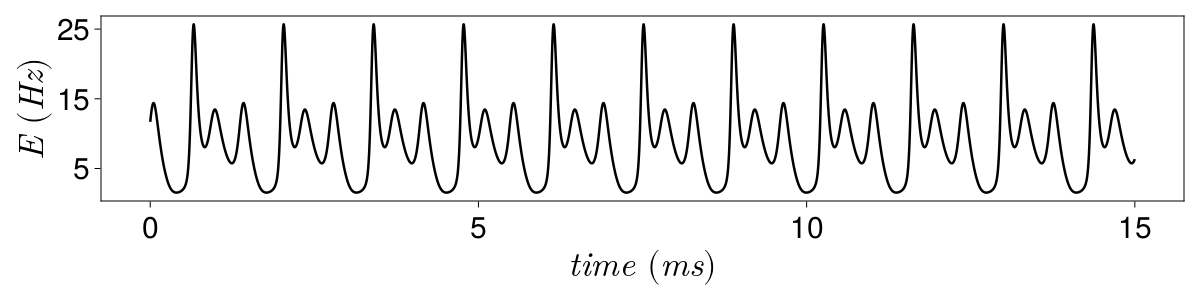

In [62]:
f = Figure(resolution = (1200, 300))
axis = Axis(f[1, 1], xlabel = L"$time$ $(ms)$", ylabel = L"$E$ $(Hz)$",
            xlabelsize = lb_size, ylabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size,
            xgridvisible = false, ygridvisible = false, yticks = [5, 15, 25])
lines!(axis, trange[ts:tf], tr_bur[ts:tf, 1], linewidth = 2.5, color = :black)
f

In [63]:
save("timeseries_burst_Levanova.eps", f)

CairoMakie.Screen{EPS}


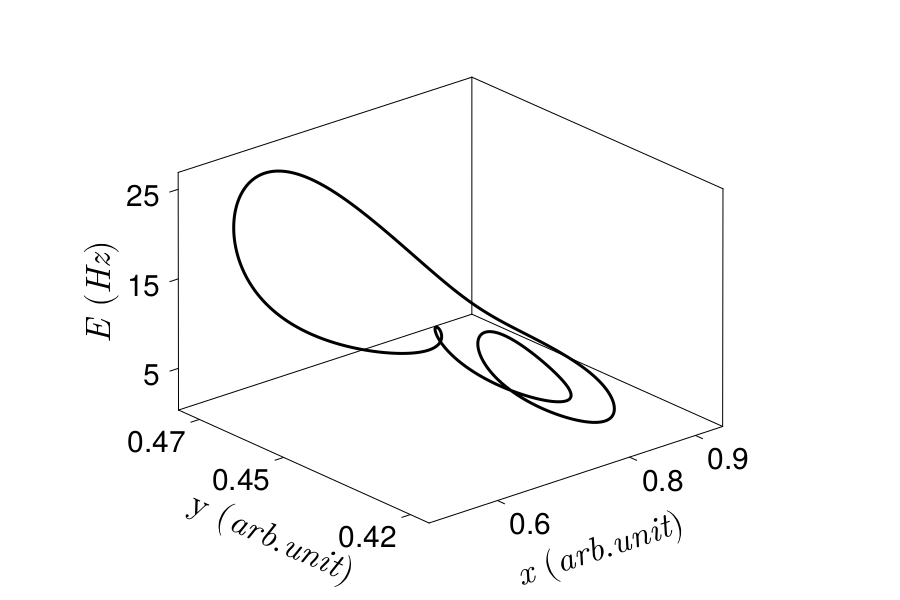

In [43]:
f = Figure(resolution = (900, 600))
axis3 = Axis3(f[1, 1], xlabel = L"$x$ $(arb. unit)$", ylabel = L"y $(arb. unit)$", zlabel = L"$E$ $(Hz)$",
                xlabelsize = lb_size, ylabelsize = lb_size, zlabelsize = lb_size,
                xticklabelsize = tck_size, yticklabelsize = tck_size, zticklabelsize = tck_size,
                xgridvisible = false, ygridvisible = false, zgridvisible = false,
                xticks = [0.6, 0.8, 0.9], yticks = [0.42, 0.45, 0.47], zticks = [5, 15, 25],
                protrusions = dis, xlabeloffset = dis, ylabeloffset = dis, zlabeloffset = dis)

lines!(axis3, tr_bur[ts:tf, 2], tr_bur[ts:tf, 3], tr_bur[ts:tf, 1], linewidth = 3.0, color = :black)
f

### 2-period limit cycle

In [23]:
p_2lc = SA[α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, -1.49854042]
u0_2lc = SA[6.530858570620066, 0.703597679411986, 0.41933517415636135]
ds_2lc = ContinuousDynamicalSystem(TM, u0_2lc, p_2lc)

3-dimensional CoupledODEs
 deterministic: true
 discrete time: false
 in-place:      false
 dynamic rule:  TM
 ODE solver:    Tsit5
 ODE kwargs:    (abstol = 1.0e-6, reltol = 1.0e-6)
 parameters:    [1.58, 0.013, 0.08, 3.3, 3.07, 0.75, 0.4, 0.3, 0.305, 0.3, -1.49854042]
 time:          0.0
 state:         [6.530858570620066, 0.703597679411986, 0.41933517415636135]


In [24]:
tr_2lc, _ = trajectory(ds_2lc, t, Δt = tstep; Ttr = tt)
trange = range(0.0, t, step = tstep);

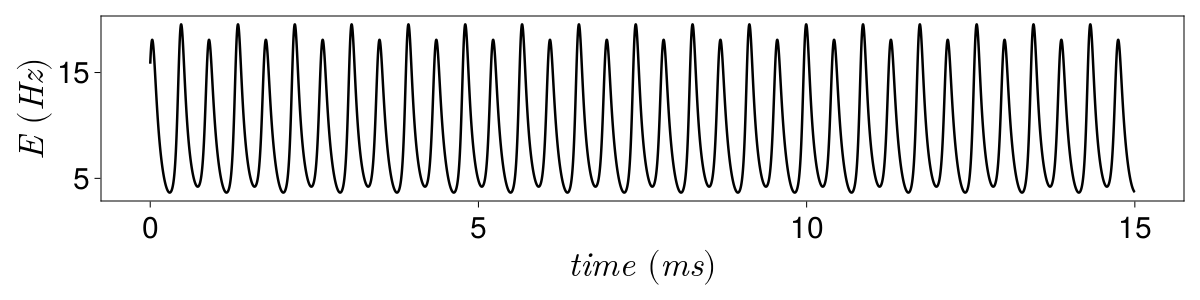

In [44]:
f = Figure(resolution = (1200, 300))
axis = Axis(f[1, 1], xlabel = L"$time$ $(ms)$", ylabel = L"$E$ $(Hz)$",
            xlabelsize = lb_size, ylabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size,
            xgridvisible = false, ygridvisible = false, yticks = [5, 15, 25])
lines!(axis, trange[ts:tf], tr_2lc[ts:tf, 1], linewidth = 2.5, color = :black)
f

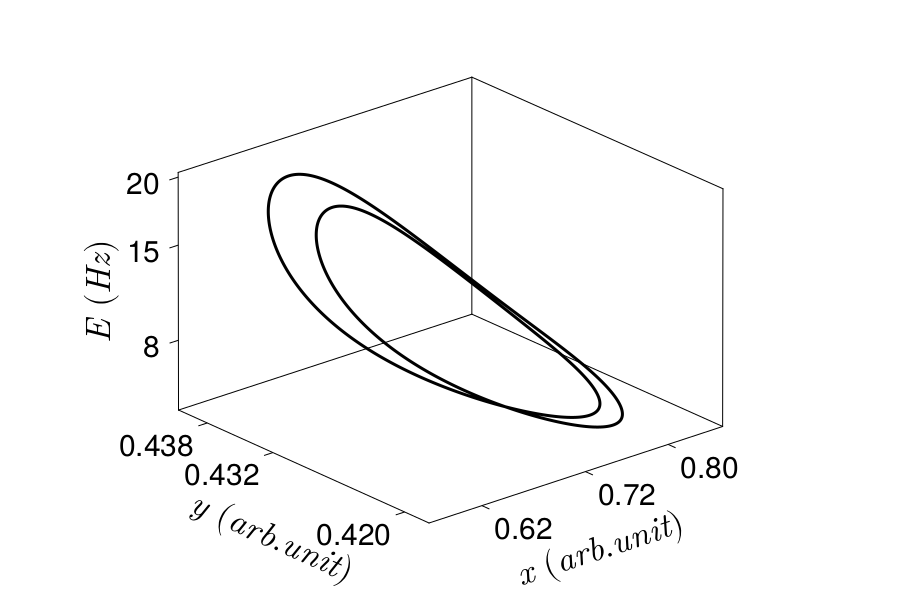

In [64]:
f = Figure(resolution = (900, 600))
axis3 = Axis3(f[1, 1], xlabel = L"$x$ $(arb. unit)$", ylabel = L"$y$ $(arb. unit)$", zlabel = L"$E$ $(Hz)$",
                xlabelsize = lb_size, ylabelsize = lb_size, zlabelsize = lb_size,
                xticklabelsize = tck_size, yticklabelsize = tck_size, zticklabelsize = tck_size,
                xgridvisible = false, ygridvisible = false, zgridvisible = false,
                xticks = [0.62, 0.72, 0.80], yticks = [0.42, 0.432, 0.438], zticks = [8, 15, 20],
                protrusions = dis, xlabeloffset = dis, ylabeloffset = dis, zlabeloffset = dis)

lines!(axis3, tr_2lc[ts:tf, 2], tr_2lc[ts:tf, 3], tr_2lc[ts:tf, 1], linewidth = 3.0, color = :black)
f

In [65]:
save("phase_2-period_cycle.eps", f)

CairoMakie.Screen{EPS}


### 4-period limit cycle

In [28]:
p_4lc = SA[α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, -1.56203902]
u0_4lc = SA[20.455045022701544, 0.6593363650670052, 0.4460452247536085]
ds_4lc = ContinuousDynamicalSystem(TM, u0_4lc, p_4lc)

3-dimensional CoupledODEs
 deterministic: true
 discrete time: false
 in-place:      false
 dynamic rule:  TM
 ODE solver:    Tsit5
 ODE kwargs:    (abstol = 1.0e-6, reltol = 1.0e-6)
 parameters:    [1.58, 0.013, 0.08, 3.3, 3.07, 0.75, 0.4, 0.3, 0.305, 0.3, -1.56203902]
 time:          0.0
 state:         [20.455045022701544, 0.6593363650670052, 0.4460452247536085]


In [29]:
tr_4lc, _ = trajectory(ds_4lc, t, Δt = tstep; Ttr = tt)
trange = range(0.0, t, step = tstep);

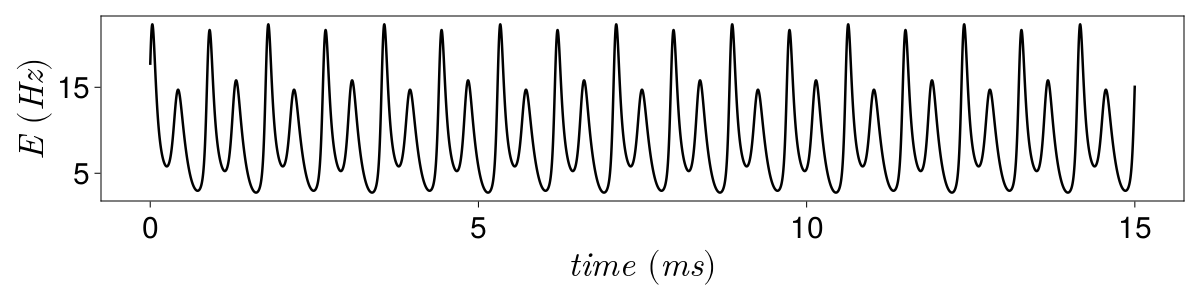

In [46]:
f = Figure(resolution = (1200, 300))
axis = Axis(f[1, 1], xlabel = L"$time$ $(ms)$", ylabel = L"$E$ $(Hz)$",
            xlabelsize = lb_size, ylabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size,
            xgridvisible = false, ygridvisible = false, yticks = [5, 15, 25])
lines!(axis, trange[ts:tf], tr_4lc[ts:tf, 1], linewidth = 2.5, color = :black)
f

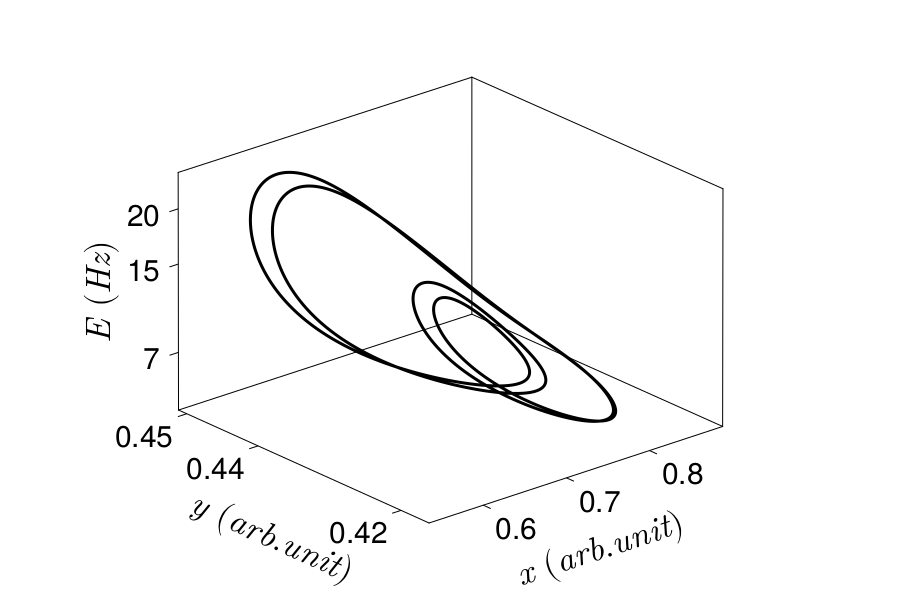

In [66]:
f = Figure(resolution = (900, 600))
axis3 = Axis3(f[1, 1], xlabel = L"$x$ $(arb. unit)$", ylabel = L"$y$ $(arb. unit)$", zlabel = L"$E$ $(Hz)$",
                xlabelsize = lb_size, ylabelsize = lb_size, zlabelsize = lb_size,
                xticklabelsize = tck_size, yticklabelsize = tck_size, zticklabelsize = tck_size,
                xgridvisible = false, ygridvisible = false, zgridvisible = false,
                yticks = [0.42, 0.44, 0.45], zticks = [7, 15, 20],
                protrusions = dis, xlabeloffset = dis, ylabeloffset = dis, zlabeloffset = dis)

lines!(axis3, tr_4lc[ts:tf, 2], tr_4lc[ts:tf, 3], tr_4lc[ts:tf, 1], linewidth = 3.0, color = :black)
f

In [67]:
save("phase_4-period_cycle.eps", f)

CairoMakie.Screen{EPS}


### Chaos

In [33]:
p_chaos = SA[α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, -1.59]
u0_chaos = SA[13.543826451566403, 0.5952999600378198, 0.4748946434767823]
ds_chaos = CoupledODEs(TM, u0_chaos, p_chaos)

3-dimensional CoupledODEs
 deterministic: true
 discrete time: false
 in-place:      false
 dynamic rule:  TM
 ODE solver:    Tsit5
 ODE kwargs:    (abstol = 1.0e-6, reltol = 1.0e-6)
 parameters:    [1.58, 0.013, 0.08, 3.3, 3.07, 0.75, 0.4, 0.3, 0.305, 0.3, -1.59]
 time:          0.0
 state:         [13.543826451566403, 0.5952999600378198, 0.4748946434767823]


In [34]:
tr_chaos, _ = trajectory(ds_chaos, t, Δt = tstep; Ttr = tt);

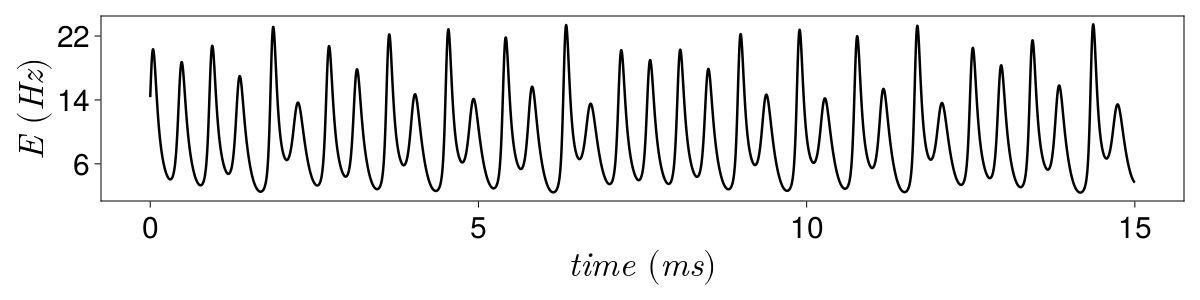

In [68]:
ts, tf = 1, 15000;
f = Figure(resolution = (1200, 300))
axis = Axis(f[1, 1], xlabel = L"$time$ $(ms)$", ylabel = L"$E$ $(Hz)$",
            xlabelsize = lb_size, ylabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size,
            xgridvisible = false, ygridvisible = false, yticks = [6, 14, 22])
lines!(axis, trange[ts:tf], tr_chaos[ts:tf, 1], linewidth = 2.5, color = :black)
f

In [69]:
save("timeseries_chaos_Levanova.eps", f)

CairoMakie.Screen{EPS}


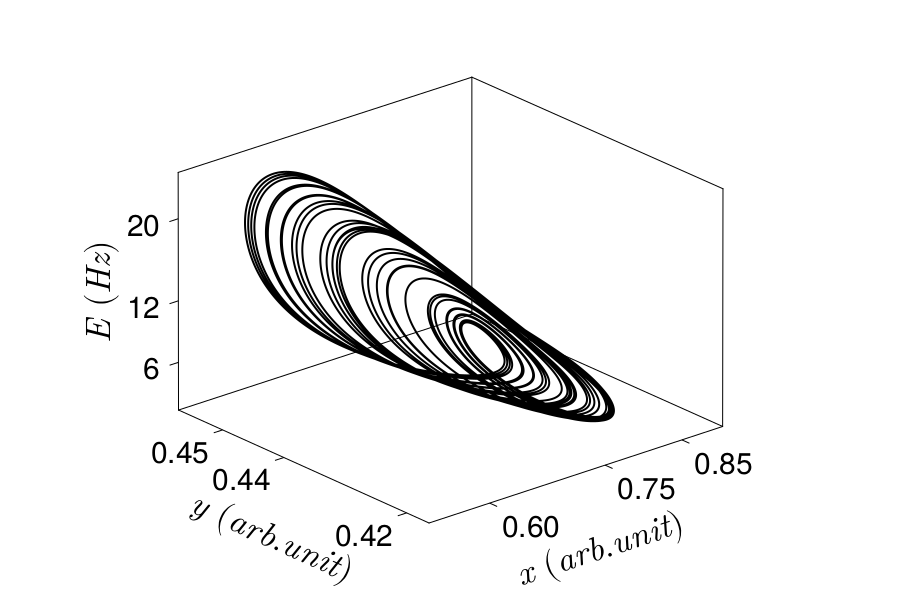

In [70]:
ts, tf = 1, 15000;
f = Figure(resolution = (900, 600))
axis3 = Axis3(f[1, 1], xlabel = L"$x$ $(arb. unit)$", ylabel = L"$y$ $(arb. unit)$", zlabel = L"$E$ $(Hz)$",
                xlabelsize = lb_size, ylabelsize = lb_size, zlabelsize = lb_size,
                xticklabelsize = tck_size, yticklabelsize = tck_size, zticklabelsize = tck_size,
                xgridvisible = false, ygridvisible = false, zgridvisible = false,
                xticks = [0.6, 0.75, 0.85], yticks = [0.42, 0.44, 0.45], zticks = [6, 12, 20],
                protrusions = dis, xlabeloffset = dis, ylabeloffset = dis, zlabeloffset = dis)

lines!(axis3, tr_chaos[ts:tf, 2], tr_chaos[ts:tf, 3], tr_chaos[ts:tf, 1], linewidth = 2.0, color = :black)
f

In [71]:
save("phase_chaos_Levanova.eps", f)

CairoMakie.Screen{EPS}


### Multistability

In [16]:
p_burst = SA[α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, -1.6]
u0_burst = SA[3.8398031438626057, 0.8237522227211204, 0.4265960327571268]
ds_burst = ContinuousDynamicalSystem(TM, u0_burst, p_burst)

3-dimensional continuous dynamical system
 state:       [3.8398, 0.823752, 0.426596]
 rule f:      TM
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [1.58, 0.013, 0.08, 3.3, 3.07, 0.75, 0.4, 0.3, 0.305, 0.3, -1.6]

In [17]:
p_burst1 = SA[α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, -1.6]
u0_burst1 = SA[10.114129259254579, 0.7043935355527935, 0.41019986371663264]
ds_burst1 = ContinuousDynamicalSystem(TM, u0_burst1, p_burst1)

3-dimensional continuous dynamical system
 state:       [10.1141, 0.704394, 0.4102]
 rule f:      TM
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [1.58, 0.013, 0.08, 3.3, 3.07, 0.75, 0.4, 0.3, 0.305, 0.3, -1.6]

In [18]:
tr_burst = trajectory(ds_burst, t, Δt = tstep; Ttr = tt, diffeq = integ_set)
tr_burst1 = trajectory(ds_burst1, t, Δt = tstep; Ttr = tt, diffeq = integ_set);

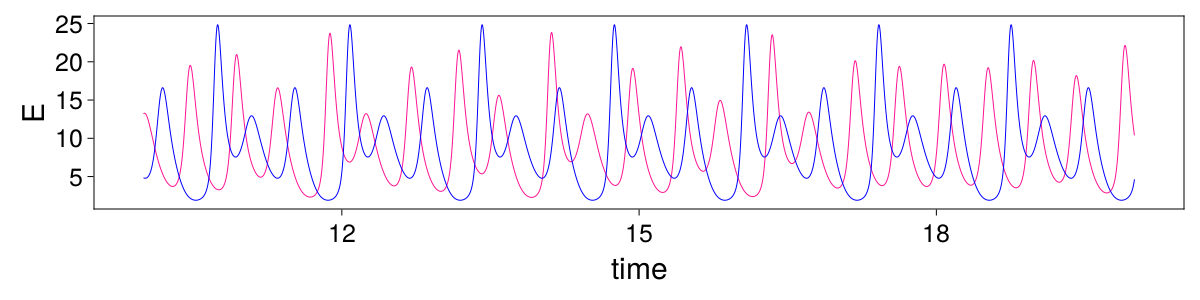

In [19]:
ts, tf = 10000, 20000;
f = Figure(resolution = (1200, 300))
axis = Axis(f[1, 1], xlabel = "time", ylabel = "E",
            xlabelsize = lb_size, ylabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size,
            xgridvisible = false, ygridvisible = false)
lines!(axis, trange[ts:tf], tr_burst[ts:tf, 1], linewidth = 1.0, color = :deeppink)
lines!(axis, trange[ts:tf], tr_burst1[ts:tf, 1], linewidth = 1.0, color = :blue)
f

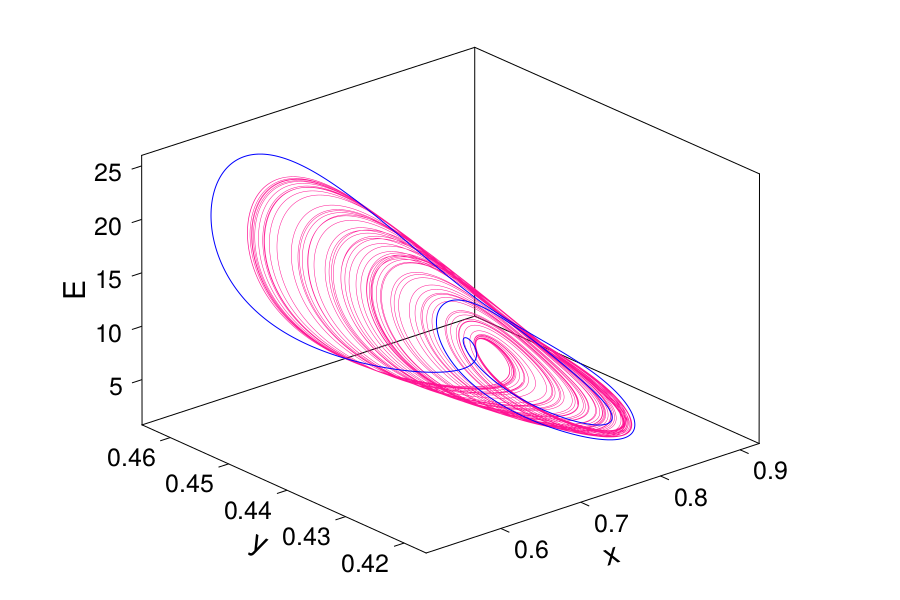

In [20]:
ts, tf = 1, 30000
idx, idy, idz = 2, 3, 1

f = Figure(resolution = (900, 600))
axis3 = Axis3(f[1, 1], xlabel = "x", ylabel = "y", zlabel = "E",
                xlabelsize = lb_size, ylabelsize = lb_size, zlabelsize = lb_size,
                xticklabelsize = tck_size, yticklabelsize = tck_size, zticklabelsize = tck_size,
                xgridvisible = false, ygridvisible = false, zgridvisible = false)
lines!(axis3, tr_burst[ts:tf, idx], tr_burst[ts:tf, idy], tr_burst[ts:tf, idz], linewidth = 0.5, color = :deeppink)
lines!(axis3, tr_burst1[ts:tf, idx], tr_burst1[ts:tf, idy], tr_burst1[ts:tf, idz], linewidth = 1, color = :blue)
f